In [198]:
import numpy as np
from matplotlib import pyplot as plt

# [Problem 1] Linear function

In [199]:
x_ndarray = np.arange(-50, 50.1, 0.1)
y_ndarray = x_ndarray/2 + 1

# [Problem 2] Array combination

In [200]:
xy_ndarray = np.concatenate((x_ndarray[:,np.newaxis], y_ndarray[:,np.newaxis]), axis=1)
print(xy_ndarray)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


# [Problem 3] Find the gradient

In [201]:
gradient = np.array(y_ndarray[1:] - y_ndarray[:-1])/(x_ndarray[1:] - x_ndarray[:-1])

# [Problem 4] Draw a graph

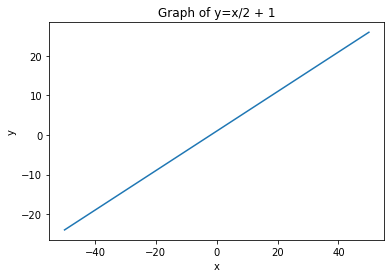

In [202]:
plt.title("Graph of y=x/2 + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xy_ndarray[:,0], xy_ndarray[:,1])
plt.show()

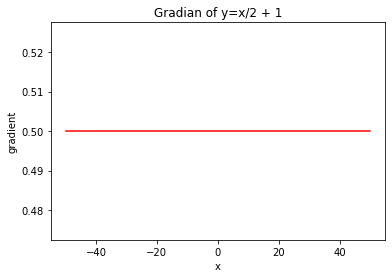

In [203]:
plt.title("Gradian of y=x/2 + 1")
plt.xlabel("x")
plt.ylabel("gradient")
# Gradient is present from the second index
plt.plot(xy_ndarray[1:,0], gradient,c='red')
plt.show()

Review: Gradient of a linear function is constant.

# [Problem 5] Python functionalization

In [204]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1), x_range_3=(0, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.
    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange ().
    x_range : tuple
      Same as the above but this is for function3 with sin function
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    # Tuple is used for the default argument, we first unpack it with *
    if x_range != None:
        x_array = np.arange(*x_range)
    else:
        x_array = np.arange(*x_range_3)
    y_array = function(x_array)
    xy_array = np.concatenate((x_array[:,np.newaxis], y_array[:,np.newaxis]), axis=1)
    gradient = (xy_array[1:, 1] - xy_array[:-1, 1])/(xy_array[1:,0] - xy_array[:-1, 0])
    return xy_array, gradient

In [205]:
def function1(x_array):
    y_array = x_array**2
    return y_array
def function2(x_array):
    y_array = 2*x_array**2 + 2**x_array
    return y_array
def function3(x_array):
    y_array = np.sin(x_array**.5)
    return y_array

In [206]:
xy_array1, gradient1 = compute_gradient(function1)
xy_array2, gradient2 = compute_gradient(function2)
xy_array3, gradient3 = compute_gradient(function3,x_range=None)

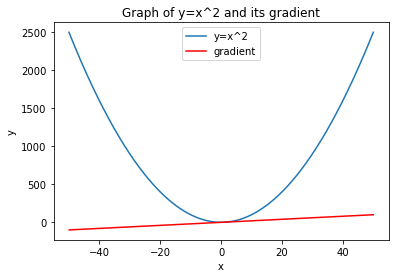

In [207]:
plt.title("Graph of y=x^2 and its gradient")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xy_array1[:,0], xy_array1[:,1],label = "y=x^2")
plt.plot(xy_array1[1:,0], gradient1,c='red',label = "gradient")
plt.legend()
plt.show()

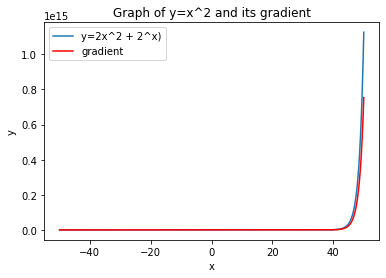

In [208]:
plt.title("Graph of y=x^2 and its gradient")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xy_array2[:,0], xy_array2[:,1],label = "y=2x^2 + 2^x)")
plt.plot(xy_array2[1:,0], gradient2,c='red',label = "gradient")
plt.legend()
plt.show()

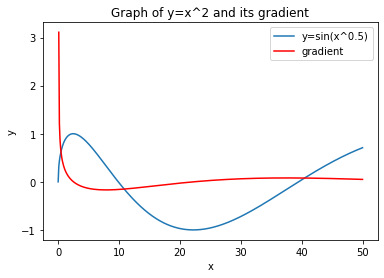

In [209]:
plt.title("Graph of y=x^2 and its gradient")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xy_array3[:,0], xy_array3[:,1], label = "y=sin(x^0.5)")
plt.plot(xy_array3[1:,0], gradient3,c='red',label = "gradient")
plt.legend()
plt.show()

# [Problem 6] Find the minimum value

In [210]:
minimum_point1 = (xy_array1[:,0][xy_array1[:,1].argmin()], xy_array1[:,1].min())
print("Minimum of function 1 reaches at (x,y) = ({:.2f},{:.2f})".format(minimum_point1[0], minimum_point1[1]))
print("10 gradient around this min")
for i in range(-5,6,1):
    if i == 0:
        print("-> Change sign at ",end="")
    print("{:.1f}".format(gradient1[xy_array1[:,1].argmin()+i]), end=",")

Minimum of function 1 reaches at (x,y) = (0.00,0.00)
10 gradient around this min
-0.9,-0.7,-0.5,-0.3,-0.1,-> Change sign at 0.1,0.3,0.5,0.7,0.9,1.1,

In [211]:
minimum_point2 = (xy_array2[:,0][xy_array2[:,1].argmin()], xy_array2[:,1].min())
print("Minimum of function 2 reaches at (x,y) = ({:.2f},{:.2f})".format(minimum_point2[0], minimum_point2[1]))
print("10 gradient around this min")
for i in range(-5,6,1):
    if i == 0:
        print("-> Change sign at ",end="")
    print("{:.1f}".format(gradient2[xy_array2[:,1].argmin()+i]), end=",")
minimum_point3 = (xy_array3[:,0][xy_array3[:,1].argmin()], xy_array3[:,1].min())

Minimum of function 2 reaches at (x,y) = (-0.20,0.95)
10 gradient around this min
-2.2,-1.7,-1.3,-0.9,-0.4,-> Change sign at 0.0,0.5,0.9,1.4,1.8,2.3,

In [212]:
minimum_point3 = (xy_array2[:,0][xy_array3[:,1].argmin()], xy_array3[:,1].min())
print("Minimum of function 3 reaches at (x,y) = ({:.2f},{:.2f})".format(minimum_point3[0], minimum_point3[1]))
print("10 gradient around this min")
for i in range(-5,6,1):
    if i == 0:
        print("-> Change sign at ",end="")
    print("{:.6f}".format(gradient3[xy_array3[:,1].argmin()+i]), end=",")

Minimum of function 3 reaches at (x,y) = (-27.80,-1.00)
10 gradient around this min
-0.005219,-0.004063,-0.002914,-0.001773,-0.000639,-> Change sign at 0.000487,0.001606,0.002717,0.003820,0.004916,0.006004,